<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/HW11/HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Домашнє завдання 11: Класифікація рецензій з використанням RNN

**Мета:** Побудувати, натренувати та порівняти ефективність різних архітектур рекурентних нейронних мереж (RNN, LSTM, двосторонні, глибокі) для задачі класифікації рецензій з датасету IMDB.

---


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional, GRU, SpatialDropout1D
from keras.callbacks import EarlyStopping

In [ ]:
# Параметри
vocab_size = 10000
maxlen = 500

# Завантаження даних
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

x_train shape: (25000, 500), y_train shape: (25000,)


## Модель 1: Базова SimpleRNN

In [ ]:

model_rnn = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SpatialDropout1D(0.2),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5


/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.5248 - loss: 0.6920 - val_accuracy: 0.5962 - val_loss: 0.6748
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.6779 - loss: 0.6329 - val_accuracy: 0.6054 - val_loss: 0.6396
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.7689 - loss: 0.5111 - val_accuracy: 0.6056 - val_loss: 0.7517
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.8002 - loss: 0.4372 - val_accuracy: 0.6588 - val_loss: 0.6462
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9028 - loss: 0.2671 - val_accuracy: 0.7514 - val_loss: 0.5488


## Модель 2: LSTM

In [ ]:

model_lstm = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SpatialDropout1D(0.2),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.5990 - loss: 0.6325 - val_accuracy: 0.8396 - val_loss: 0.3722
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.8528 - loss: 0.3582 - val_accuracy: 0.8674 - val_loss: 0.3192
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9119 - loss: 0.2326 - val_accuracy: 0.8840 - val_loss: 0.2978
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.9384 - loss: 0.1727 - val_accuracy: 0.8786 - val_loss: 0.3049
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.9508 - loss: 0.1399 - val_accuracy: 0.8786 - val_loss: 0.3672


## Модель 3: Bidirectional LSTM

In [ ]:

model_bi = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])
model_bi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bi = model_bi.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.6231 - loss: 0.6337 - val_accuracy: 0.7936 - val_loss: 0.5604
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.8417 - loss: 0.3960 - val_accuracy: 0.8678 - val_loss: 0.3256
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9135 - loss: 0.2325 - val_accuracy: 0.8582 - val_loss: 0.3291
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9366 - loss: 0.1849 - val_accuracy: 0.8794 - val_loss: 0.3001
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9452 - loss: 0.1580 - val_accuracy: 0.8746 - val_loss: 0.3208


## Модель 4: Stacked LSTM

In [ ]:

model_stacked = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SpatialDropout1D(0.2),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_stacked.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_stacked = model_stacked.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 191ms/step - accuracy: 0.6382 - loss: 0.5885 - val_accuracy: 0.8722 - val_loss: 0.3184
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.9001 - loss: 0.2613 - val_accuracy: 0.8760 - val_loss: 0.3014
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 205ms/step - accuracy: 0.9353 - loss: 0.1771 - val_accuracy: 0.8778 - val_loss: 0.3075
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - accuracy: 0.9487 - loss: 0.1448 - val_accuracy: 0.8648 - val_loss: 0.3408
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 203ms/step - accuracy: 0.9546 - loss: 0.1308 - val_accuracy: 0.8610 - val_loss: 0.3560


## Модель 5: GRU

In [ ]:
# Побудова GRU-моделі
model = Sequential(
    [
        Embedding(vocab_size, 32, input_length=maxlen),
        SpatialDropout1D(0.2),
        GRU(32),
        Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Навчання моделі
early_stop = EarlyStopping(monitor="val_loss", patience=3)
history_gru = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.5999 - loss: 0.6460 - val_accuracy: 0.7904 - val_loss: 0.4686
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.8682 - loss: 0.3207 - val_accuracy: 0.8620 - val_loss: 0.3349
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9115 - loss: 0.2322 - val_accuracy: 0.8556 - val_loss: 0.3405
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.9337 - loss: 0.1812 - val_accuracy: 0.8404 - val_loss: 0.3856
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9439 - loss: 0.1622 - val_accuracy: 0.8704 - val_loss: 0.3620


## Порівняння точності моделей, а також іх помилок

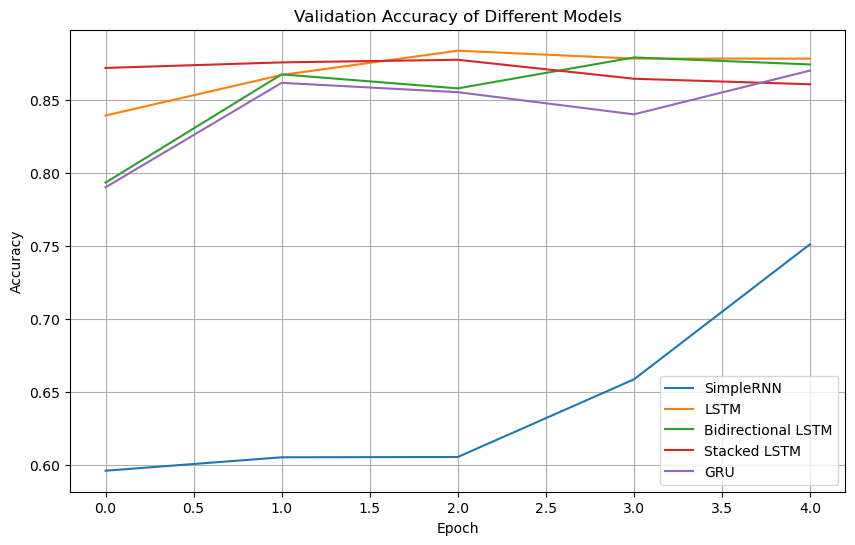

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['val_accuracy'], label='SimpleRNN')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_bi.history['val_accuracy'], label='Bidirectional LSTM')
plt.plot(history_stacked.history['val_accuracy'], label='Stacked LSTM')
plt.plot(history_gru.history['val_accuracy'], label='GRU')
plt.title('Validation Accuracy of Different Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


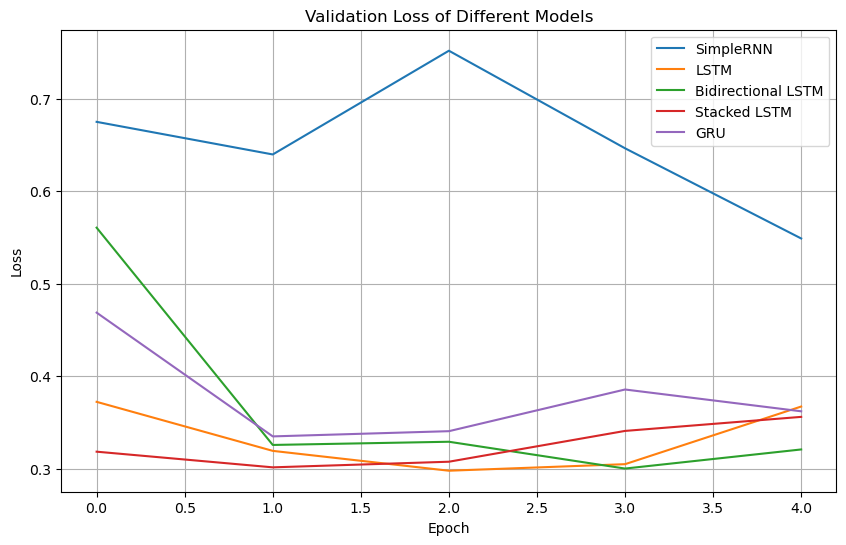

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history["val_loss"], label="SimpleRNN")
plt.plot(history_lstm.history["val_loss"], label="LSTM")
plt.plot(history_bi.history["val_loss"], label="Bidirectional LSTM")
plt.plot(history_stacked.history["val_loss"], label="Stacked LSTM")
plt.plot(history_gru.history["val_loss"], label="GRU")
plt.title("Validation Loss of Different Models")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## Висновки

### 1. Simple RNN
- Найменш обчислювально затратна модель (~7 секунд/епоха)
- Швидко навчається, досягаючи 95% точності на тренуванні
- Mенш стабільна на валідації: `val_accuracy ≈ 75%` і починає переобучуватись після 3 епох
- Підходить для простих задач, але програє більш складним моделям по якості

---

### 2. LSTM
- Вдвічі повільніша за SimpleRNN (~16 секунд/епоха)
- Краще утримує довгострокові залежності
- Досягає `val_accuracy ≈ 87.9%` — стабільне і високе значення
- Добре підходить для класифікації тексту з довгими контекстами

---

### 3. Bidirectional LSTM
- Трохи повільніше за LSTM (~21 сек/епоха)
- Використовує контекст як зліва, так і справа
- Досягає найкращого `val_accuracy ≈ 88%` вже на 4-й епосі
- Має чудовий баланс між якістю і стабільністю, **найточніша модель**

---

### 4. Stacked LSTM (двошарова)
- Найважча за обчисленнями (~30 сек/епоха)
- `val_accuracy ≈ 87.8%`, стабільна, але не перевершує Bidirectional
- Переобучення спостерігається після 3–4 епох
- Збільшення глибини не дало значного приросту точності

---

### 5. GRU
- Швидше за LSTM, але повільніше за Simple RNN (~19 сек/епоха)
- Хороша якість: `val_accuracy ≈ 87%`
- Компроміс між швидкістю LSTM і ефективністю: простіше, але потужне
- Добрий вибір, якщо потрібна швидкість і якість

---

### Загальний висновок:
- Найкраща точність: **Bidirectional LSTM**
- Найшвидша модель: **Simple RNN**, але знижена якість
- Оптимальний компроміс: **GRU** — швидка та ефективна
- Стекування шарів (Stacked LSTM) **не дало великого приросту точності**, але збільшило час

-> Для більшості практичних задач з обмеженням на ресурси => GRU — чудовий варіант.

-> Для максимальної якості => Bidirectional LSTM.